In [20]:


using QuadGK
using PyPlot

In [14]:
integrand(x,n) = x^n * exp(-x)

integrand (generic function with 1 method)

In [15]:
n=20
quadgk_count(x->integrand(x,n), 0, 1)

(0.018350467697256213, 9.375208015196608e-11, 45)

In [16]:

np = 22
res1 = zeros(np)
res2 = zeros(np);

In [17]:
#@ is a macro
t_quadgk = @elapsed for n = 1:np
    res1[n] = quadgk(x -> integrand(x, n), 0.0, 1.0)[1]
end

0.115926262

In [18]:

# run this cell twice to exclude the compilation time
res2[1] = 1.0 - 2*exp(-1.0)
t_recur = @elapsed for n = 2:np
    res2[n] = n * res2[n-1] - exp(-1.0)
end

2.4786e-5

In [19]:

t_quadgk / t_recur

4677.0863390623745

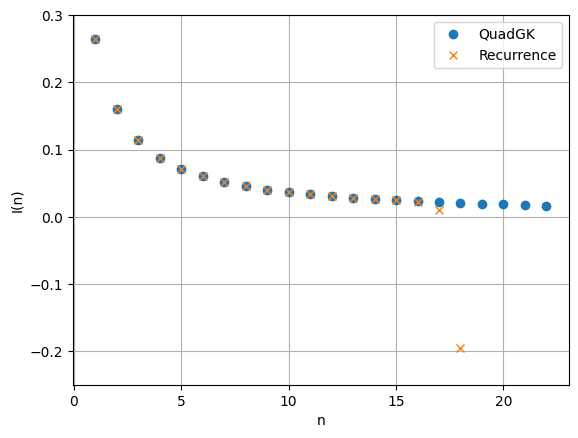

In [21]:

plot(1:np, res1, marker="o", linestyle="none", label="QuadGK")
plot(1:np, res2, marker="x", linestyle="none", label="Recurrence")
ylim(-0.25, 0.3)
legend()
grid(true)
xlabel("n")
ylabel("I(n)");